### Проект по теме "Основы машинного обучения"

#### Описание проекта:

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Перед нами стоит проблема оттока клиентов. Отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Задача — провести анализ и подготовить план действий по удержанию клиентов. 

#### План

1. Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
2. Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
3. Проанализировать основные признаки, наиболее сильно влияющие на отток;
4. Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  

а) выделить целевые группы клиентов;  
б) предложить меры по снижению оттока;  
в) определить другие особенности взаимодействия с клиентами  

#### Описание данных:

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

'gender' — пол;  
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;  
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
'Phone' — наличие контактного телефона;  
'Age' — возраст;  
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).  

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:      

'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);  
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);  
'Group_visits' — факт посещения групповых занятий;  
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;  
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;  
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.  
'Churn' — факт оттока в текущем месяце.  

### Загрузка данных

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools

In [30]:
gym_churn = pd.read_csv('C:\Users\anast\Downloads\gym_churn')
display(gym_churn.head())  

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Исследовательский анализ данных (EDA)

In [31]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [32]:
gym_churn.isna().sum() #Поиск пропущенных значений 

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [33]:
gym_churn.duplicated().sum() #Поиск дубликатов 

0

In [34]:
gym_churn.describe() #смотрим на распределение данных 

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [35]:
gym_churn.columns = gym_churn.columns.str.lower() #Приводим столбцы к нижнему регистру.

In [36]:
gym_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [37]:
display(gym_churn.groupby('churn').mean()) #средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Рассмотрим влияние факторов на отток

1) gender- Пол не влияет на отток клиентов
2) near_location - Большая часть и ушедших и оставшихся клиентов живут по близости от фитнес центра, однако этот фактор не влияет на отток клиентов.
3) partner - Среди тех, кто занимается с партнерами, больше людей остается, уходит меньше. Этот фактор полодительно влияет на отток клиентов.
4) promo_friends - Среди тех, кто пришел по акции "приведи друга", больше людей осталось, чем ушло. Опять же положительное влияние фактора.
5) phone - Наличие телефонного номера в базе никак не влияет на отток.
6) contact_period - посетители с абонементом уходят реже.
7) group_visits - среди тех, кто посещает групповые занятия отток меньше.
8) age - возраст клиента не влияет на ооток 
9) avg_additional_charges_total - те, кто пользуется большим спектром услуг, предлагаемых помимо фитнеса в цетре,  уходят реже.
10) month_to_end_contract - те, у кого еще более длительный период действия контракта, уходят реже.
11) lifetime - те, кто уже давно ходят на фитнес уходят реже, чем недавно прибывшие.
12) avg_class_frequency_total - те, у кого частота посещений в неделю выше, уходят реже.
13) avg_class_frequency_current_month - те, кто в прошлом месяце имел большую частоту посещений, уходят реже. 

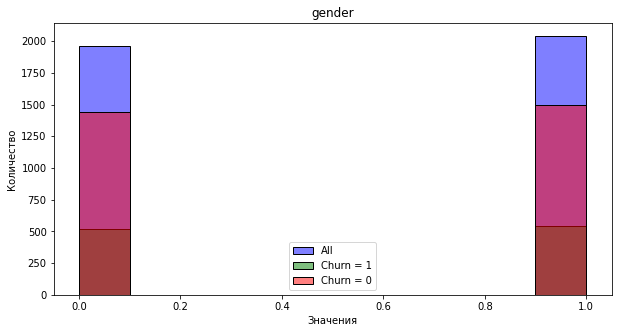

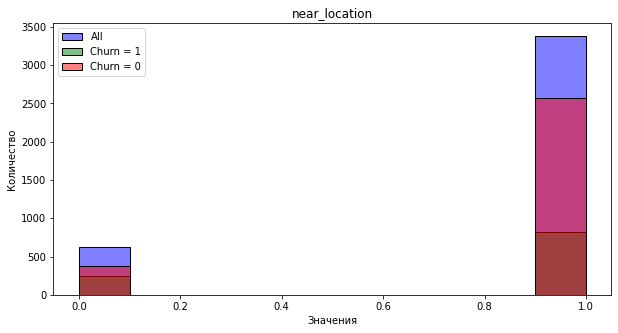

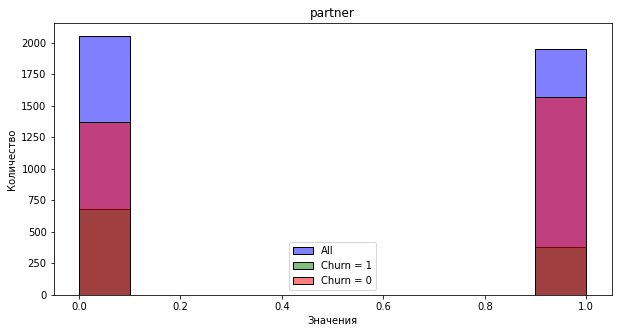

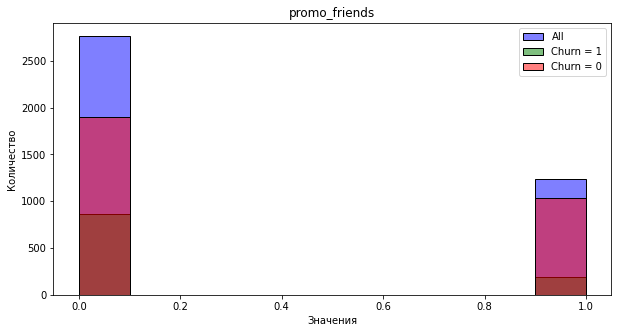

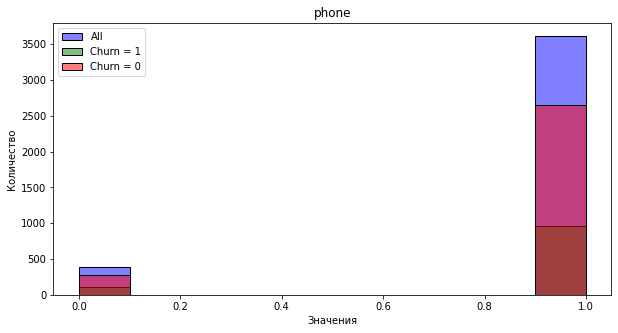

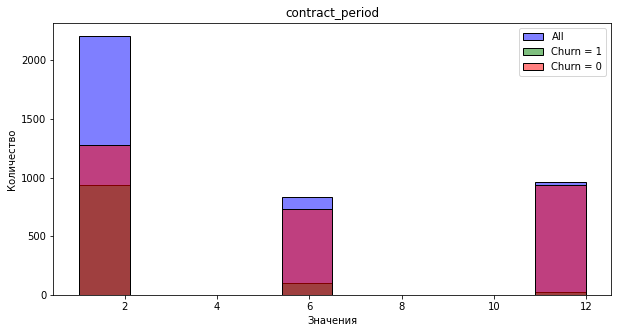

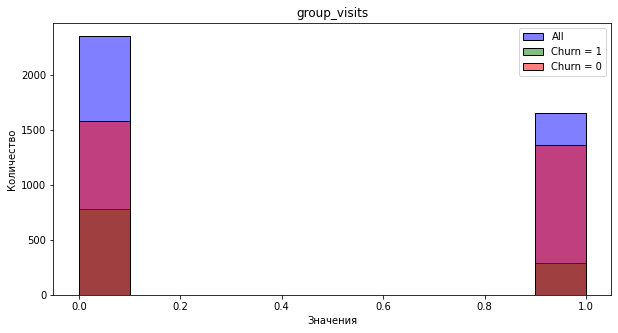

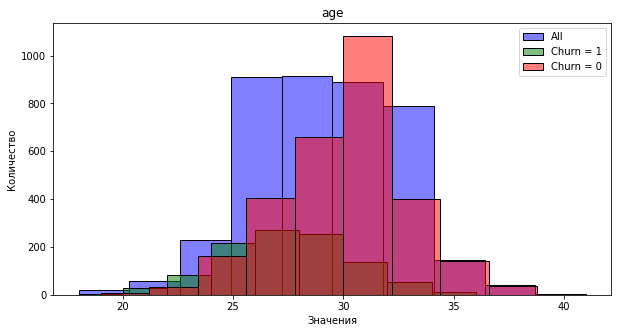

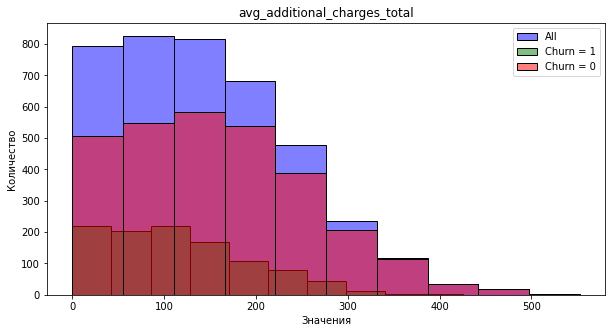

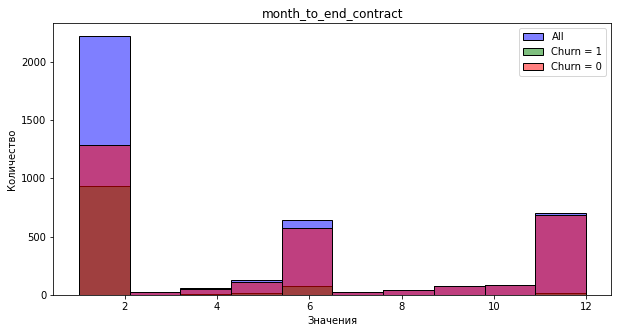

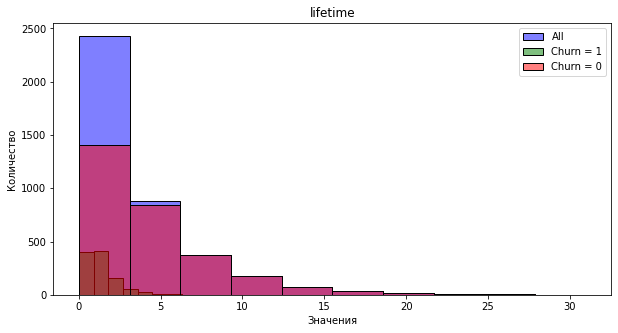

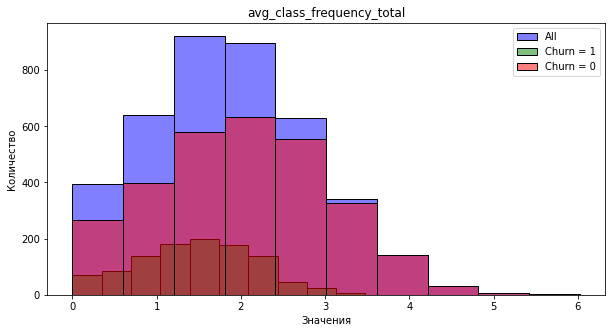

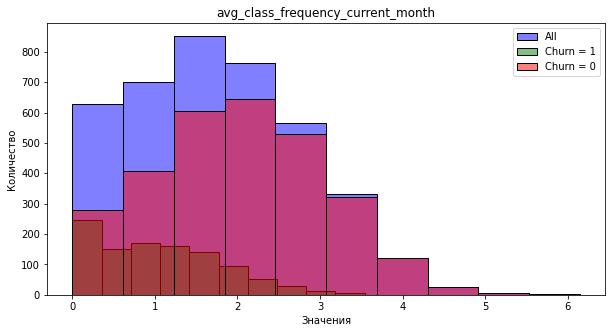

In [38]:
def hist_1(x, group_col, key_cols):
    x_new = x.copy()[key_cols]  # Создаем копию датафрейма с указанными столбцами
    for c in key_cols:  # Проходим по каждому столбцу
        
        if c == group_col: continue  # Пропускаем столбец, который является группирующим
        
        plt.figure(figsize=(10, 5))  # Создаем новую фигуру для каждого столбца
        
        # Гистограмма для всех значений столбца
        sns.histplot(x_new[c], kde=False, bins=10, color='blue', label='All', alpha=0.5)
        
        # Гистограмма для строк, где churn = 1
        sns.histplot(x_new[x_new[group_col] == 1][c], kde=False, bins=10, color='green', label='Churn = 1', alpha=0.5)
        
        # Гистограмма для строк, где churn = 0
        sns.histplot(x_new[x_new[group_col] == 0][c], kde=False, bins=10, color='red', label='Churn = 0', alpha=0.5)
        
        plt.title(c)  # Добавляем заголовок диаграммы
        plt.xlabel('Значения')  # Добавляем метку оси X
        plt.ylabel('Количество')  # Добавляем метку оси Y
        plt.legend()  # Добавляем легенду
        plt.show()  # Отображаем диаграмму

# Вызов функции
hist_1(gym_churn, 'churn', gym_churn.columns)

1) gender - мужчин и женщин примерно одинаковое количество.
2) near_location - несмотря на отсутствие влияния этого фактора на отток, мы видим, что людей, которые проживают рядом с фитнес центром большинство. 
3) partner - наличие или отсутствие партнера тоже примерно в одинаковом соотношении. 
4) promo_friends - людей, которые пришли по приглашению друга меньше, хотя этот фактор положительно влияет на отток!
5) phone - людей, которые не оставили свой номер телефона, практически нет. Хотя этот фактор не влияет на отток. 
6) contact_period - людей, которые пришли недавно большинство. 
7) group_visits - Людей, которые не посещают групповые занятия большинство, хотя посещение занятий является положительным фактором оттока.
8) age - среди тех людей, которые остались большинство имеют возраст от 30 до 33 лет. Среди тех, которые ушли, большинство имеют возраст 26 - 27 лет. А вообще средний возраст посетителей клуба от 25 - 35 лет. Почти нет людей младше 20 лет или старше 39.
9) month to end contract - у большинства людей осталось примерно 2 месяца до окончания контракта. Далее наблюдаем пиковые значения по количеству людей для тех, у кого осталось пол года или год. Возможно это те, кто только заключили контракт? Те, кто занимаются дольше, уходят реже, но и самих людей, которые занимаются долго большинство.
10) life_time - большиснтво людей недавно обратились в спорт зал, там имеет место отток. Среди людей, обратившихся более 5 месяцев назад оттока практически нет. 

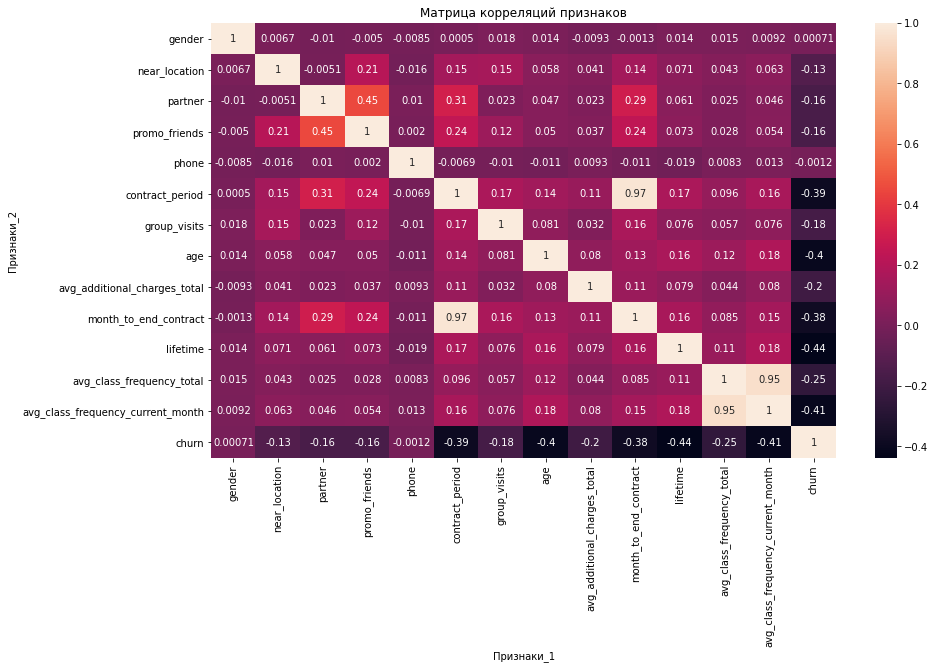

In [39]:
matrix = gym_churn.corr()
plt.figure(figsize=(14,8))
sns.heatmap(matrix, annot = True, square=False)
plt.title('Матрица корреляций признаков')
plt.xlabel('Признаки_1') 
plt.ylabel('Признаки_2') 
plt.show()

Высокую корреляцию наблюдаем для следующих пар признаков:   
1) contract_period и month_to_end_contract. Логично, чем больше период соглашения, тем больше месяцев до его окончания.  
2) avg_class_frequency_current_month и avg_calss_frequency_total. Частота посещений с начала заключения контракта до настоящего времени и частота посещений за предыдущий месяц логично связаны прямой зависимостью. 
3) Умеренную корреляцию наблюдаем между promo_friends и partner 
4) Корреляция со столбцом charm других признаков рассмотрена выше, построением гистограмм и таблицей срених значений признаков. 

### Выводы по этапу EDA

1) Типы данных не требуют преобразования
2) Пропусков и дубликатов нет.
3) Все названия столбцов приведены к нижнему регистру для дальнейшего удобства работы.  
4) Посмотрели на средние значения признаков для тех, кто ушел в отток и тех, кто остался. Положительное влияние на отток клиентов наблюдаем практически у всех признаков. Есть признаки, которые не влияют на отток: это пол, возраст, номер телефона в базе. 
5) Визуализировали распределение признаков на гистограммах, которые подтвердили наши выводы и сделали их наглядными.  
6) Построили матрицу корреляции признаков: высокую корреляцию наблюдаем между парами признаков - contract_period и month_to_end_contract, avg_class_frequency_current_month и avg_calss_frequency_total. Умеренную корреляцию наблюдаем между promo_friends и partner. 

### Модель прогнозирования оттока клиентов

In [40]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

### Логистическая регрессия

In [41]:
# Объявляем целевую переменную и признаки
X = gym_churn.drop('churn', axis=1)
y = gym_churn['churn']

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Стандартизируем данные
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# Задаем модель логистической регрессии
model = LogisticRegression(solver='liblinear')

# Обучаем ее
model.fit(X_train_st, y_train)

# Делаем предсказания
log_predictions = model.predict(X_test_st)
log_probabilities = model.predict_proba(X_test_st)[:, 1]

# Выводим результаты
print_all_metrics(
    y_test,
    log_predictions,
    log_probabilities,
    title='Метрики для логистической регрессии:',
)


Метрики для логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84


Метрика accuracy - доля правильных ответов из всех прогнозов имеет очень высокое значение, близкое к 1. Отличное значение метрики.  
Precision - доля правильных ответов среди целевого класса, чтобы оценить модель с учетом неравномерного распределения классов тоже достаточно высокое значение. 
Остальные две метрики так же близки к 1, что тоже говорит о хорошем прогнозе. 

### Случайный лес 

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_st, y_train)  # обучим модель случайного леса
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для случайного леса:',
)


Метрики для случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83


### Выводы по моделям прогнозирования оттока

Обе модели показали себя хорошо.   
При сравнении моделей лучшей оказалась логистическая регрессия, при чем по всем параметрам. Precision у нее 0.85, у "леса"-0.84, Recall у нее 0.83, у "леса"-0.81, F1 у нее 0.84, у "леса"-0.83, но при этом разница небольшая.  

Будем использовать логистическую регрессию.

### Кластеризация клиентов 

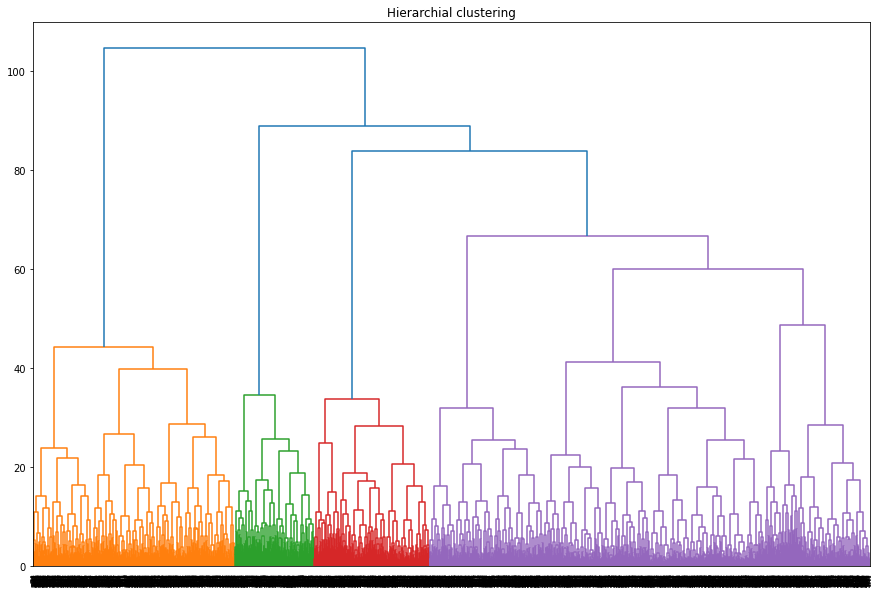

In [43]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show() 

По дендрограмме можно выделить от 4 до 6 кластеров

In [44]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 
gym_churn['cluster_km'] = labels
gym_churn.head().T

,0,1,2,3,4
gender,1.000000,0.000000,0.000000,0.000000,1.000000
near_location,1.000000,1.000000,1.000000,1.000000,1.000000
partner,1.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,1.000000,0.000000,0.000000,1.000000,1.000000
phone,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,6.000000,12.000000,1.000000,12.000000,1.000000
group_visits,1.000000,1.000000,0.000000,1.000000,0.000000
age,29.000000,31.000000,28.000000,33.000000,26.000000
avg_additional_charges_total,14.227470,113.202938,129.448479,62.669863,198.362265
month_to_end_contract,5.000000,12.000000,1.000000,12.000000,1.000000


### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [45]:
gym_churn['cluster'] = labels #создаем отдельный столбец с номером кластера

In [46]:
gym_churn.cluster.value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

In [47]:
gym_churn.drop('churn', axis=1).groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


0 - Отличительне особенности - никто не проживает по близости, практически нет тех, кто пришел по акции "приведи друга", относительно небольшое время с момента первого обращения в фитнес центр, примерно 3 месяца.  

1- Отличительные особенности - абсолютное большинство живут по близости, практически нет тех, кто пришел по акции "Приведи друга", групповых визитов уже больше чем для 0 кластера, примерно 50%, время с момента первого обращения в фитнес центр уже больше примерно 5 месяцев.  

2 - Все живут по-близости. Большинство сотрудничают с компаниями для скидки на абонемент, все записались в рамках акции - приведи друга.  

3 - Все живут по-близости, 75% сотрудничают с компаниями для скидки на абонемент, примерно половина пришла по акции приведи друга, отличает от всех других кластеров очень большая длительность текущего абонемента, почти год или 12 месяцев. Достаточно большое среди кластеров время прошло с момпента первого обращения в фитнес центр - примерно 4.7 месяца.  

4 - Все живут по-близости, небольшое время около 2 месяцев осталось действовать контракту, небольшое время прошлос 1 обращения, 2.5 месяца, самые низкие траты на посторонние расходы в фитнес центре примерно 131.  

Стоить отметить Некоторые характеристики, которые практически не различаются для всех или большинства кластеров:
gender - Везде примерно 50/50 мужичн и женщин.  
phone - абсолютное большинство оставляет свой номер телефона.  
age - средний возраст во всех класетрах колеблется в небольших пределах 28-30 лет.  
group_visit - спорный вопрос, можно ли сказать, что он примерно одинаковый у всех кластеров. Однако везде есть факт посещения групповых занятий, значение которого колеблется в пределах от 0.2 - 0.55.   

### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

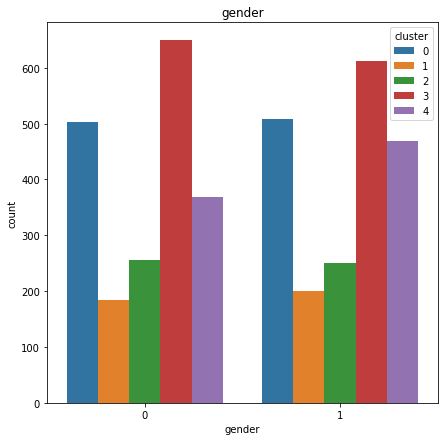

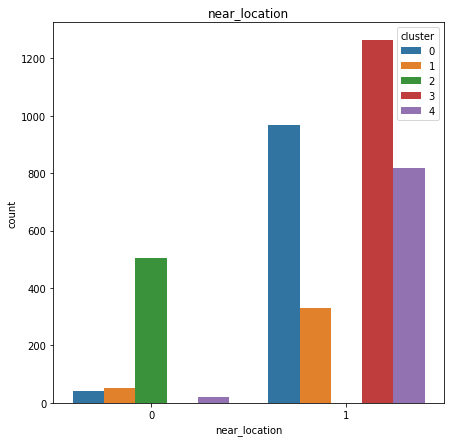

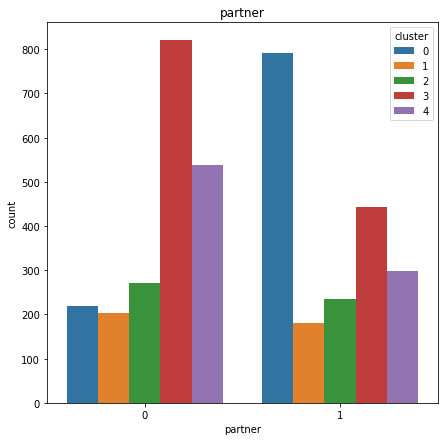

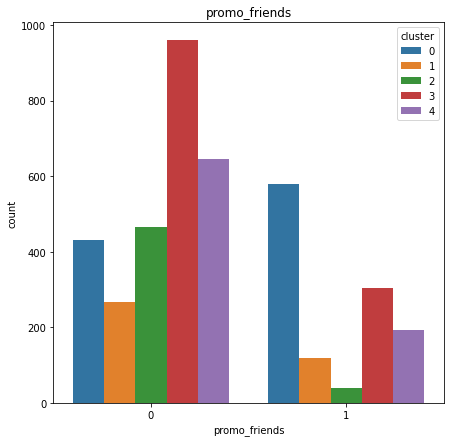

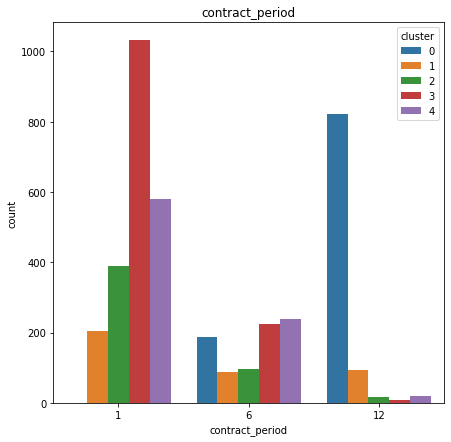

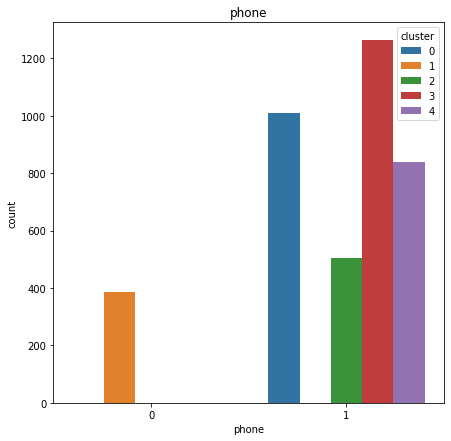

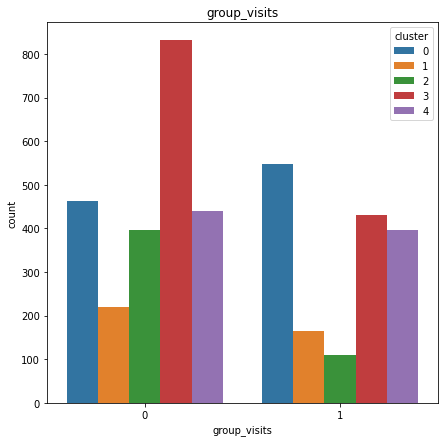

In [48]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'phone', 'group_visits']:
    plt.figure(figsize=(7, 7))
    sns.countplot(x = gym_churn[column], hue='cluster', data=gym_churn)
    plt.title(column)
    plt.show()

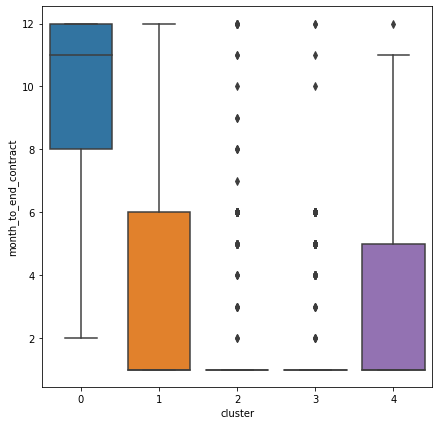

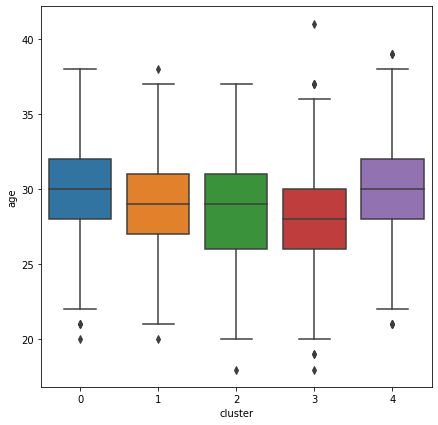

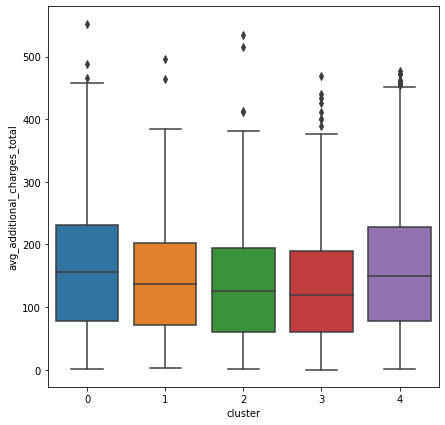

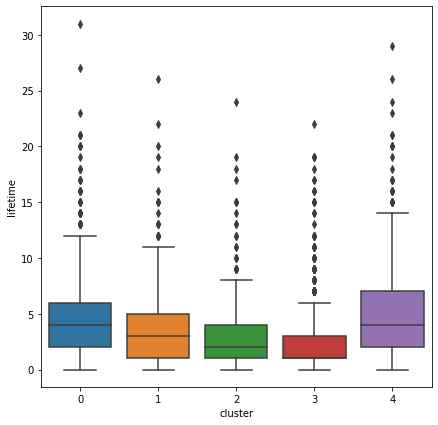

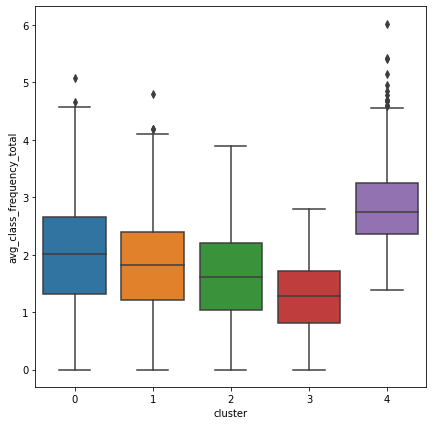

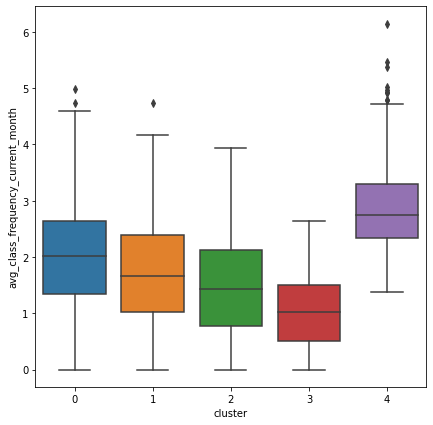

In [49]:
#теперь булевы признаки
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x = 'cluster', y = gym_churn[column], data = gym_churn)
    plt.show()

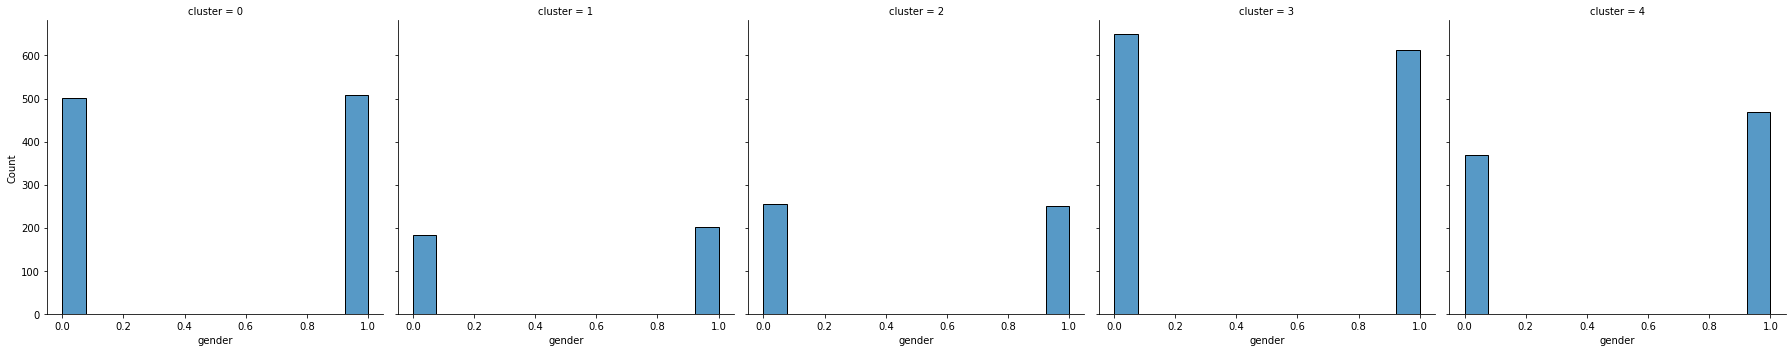

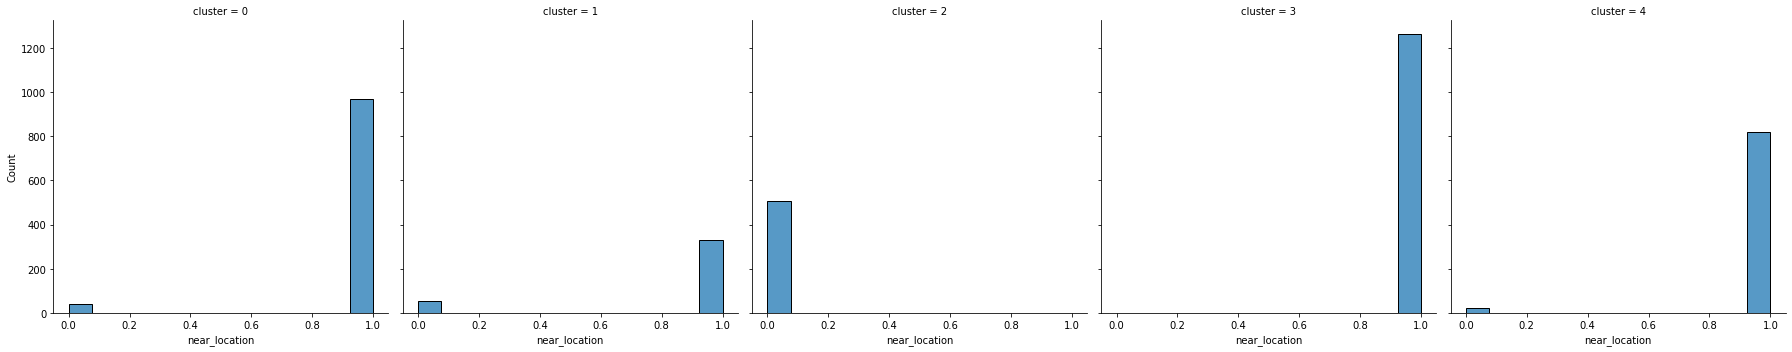

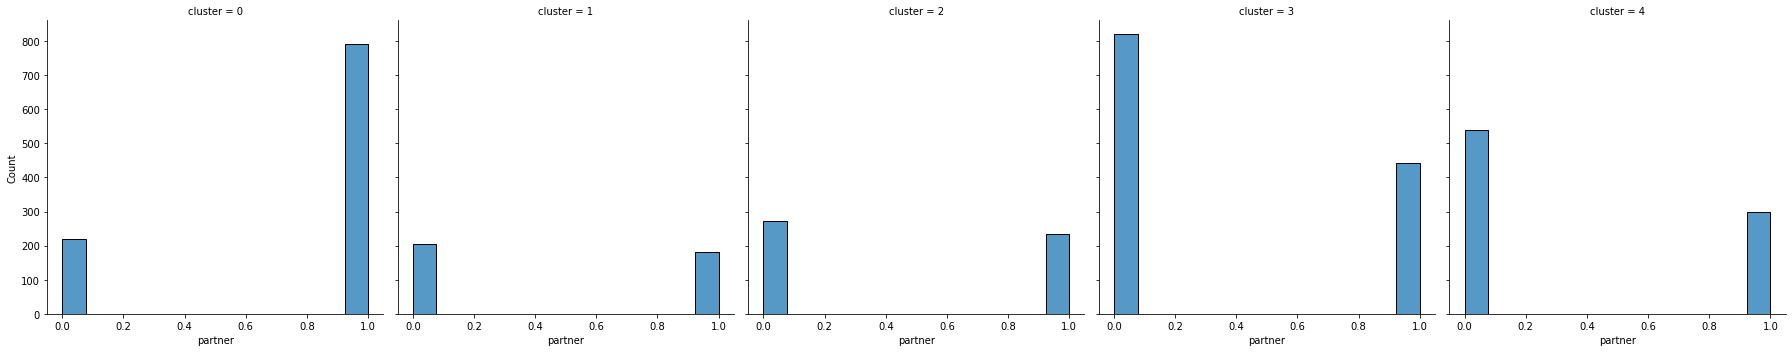

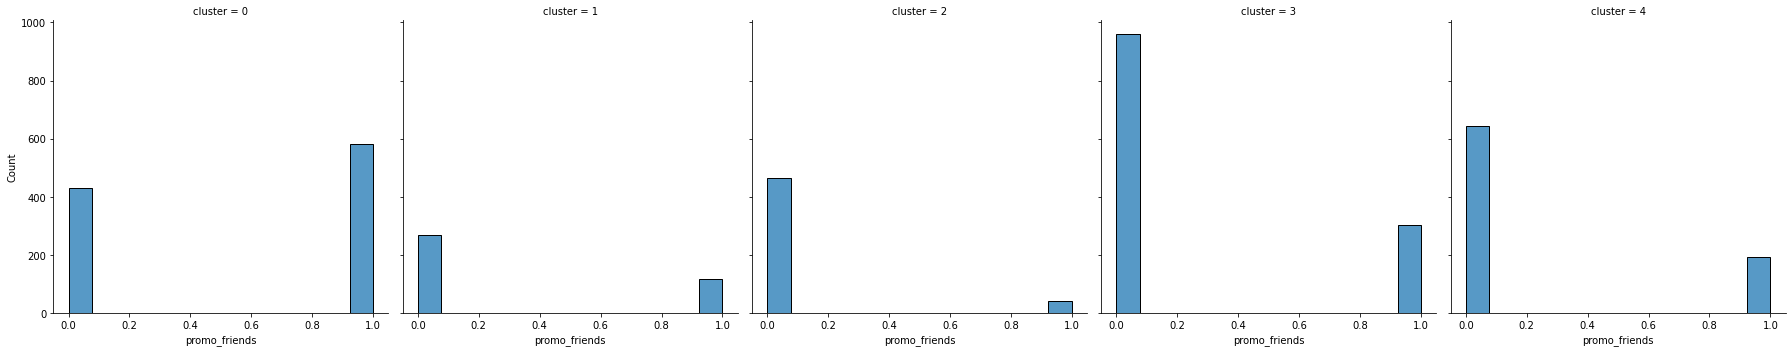

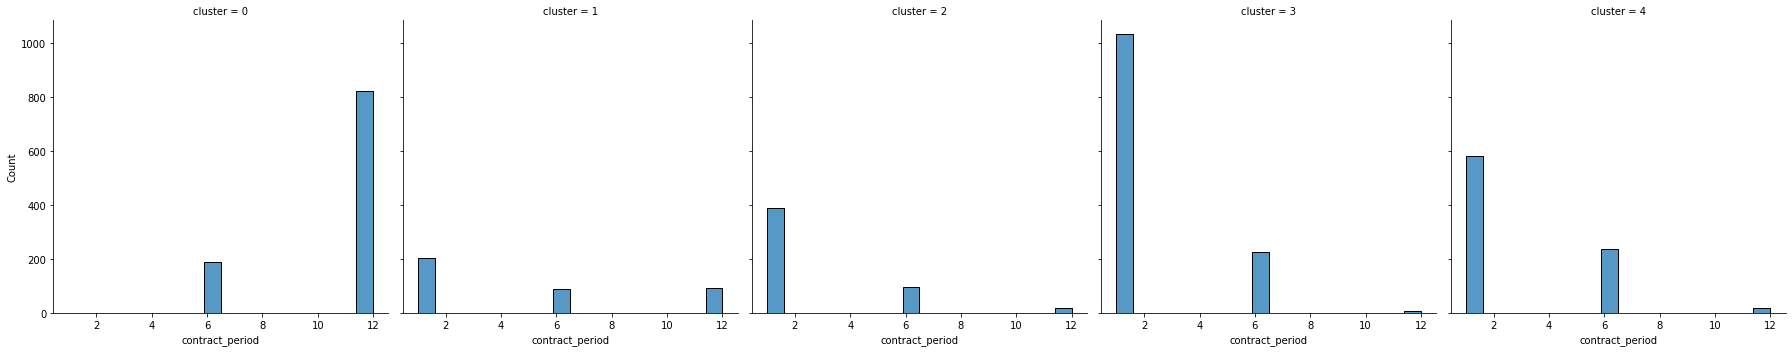

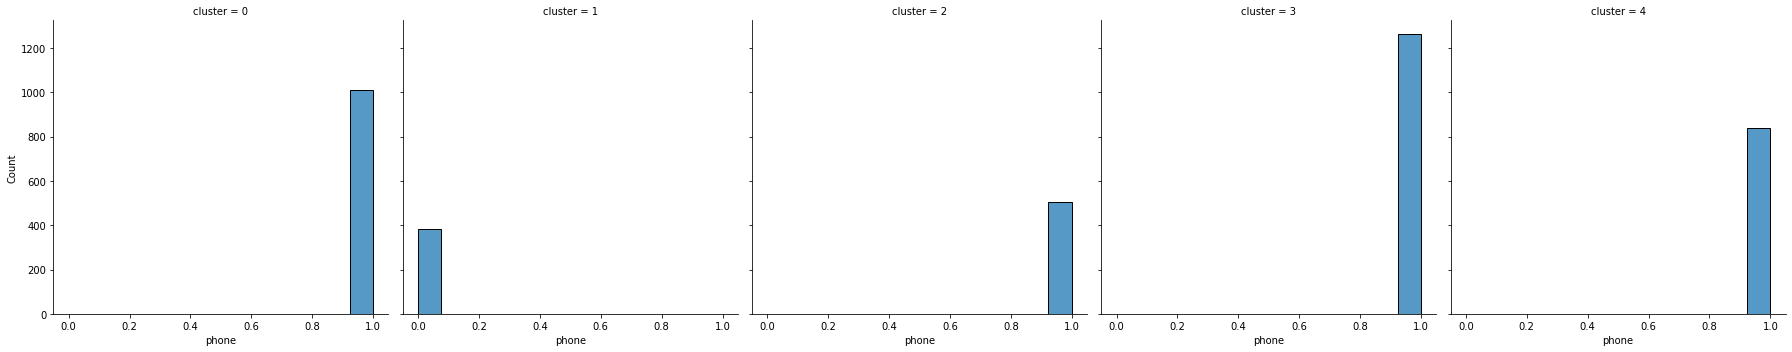

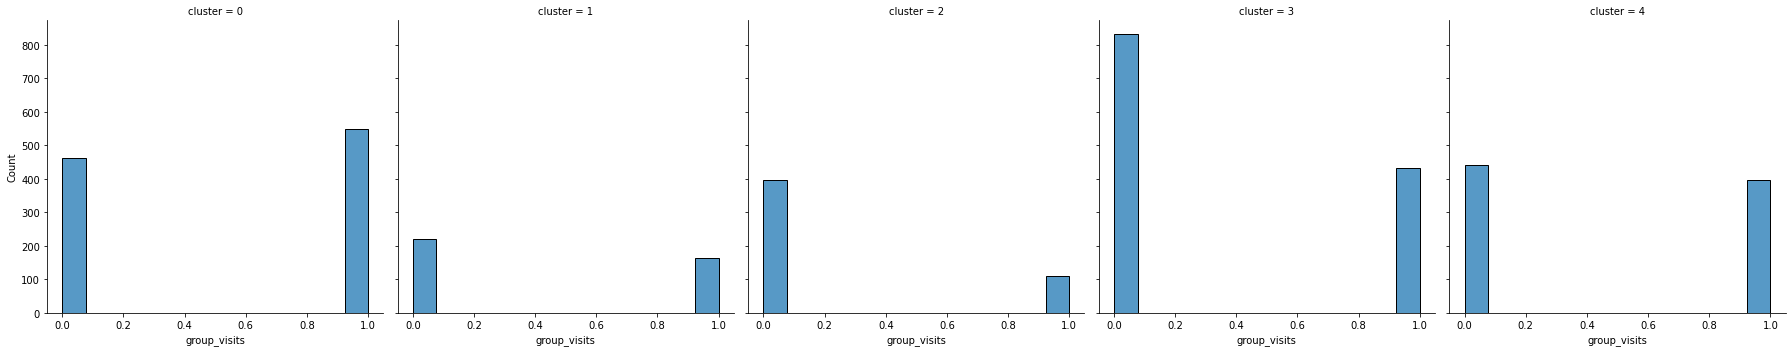

In [50]:
cl = gym_churn['cluster'].values
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'phone', 'group_visits']:
    sns.displot(data=gym_churn.assign(cluster=lambda x: cl), x=column, col = 'cluster')

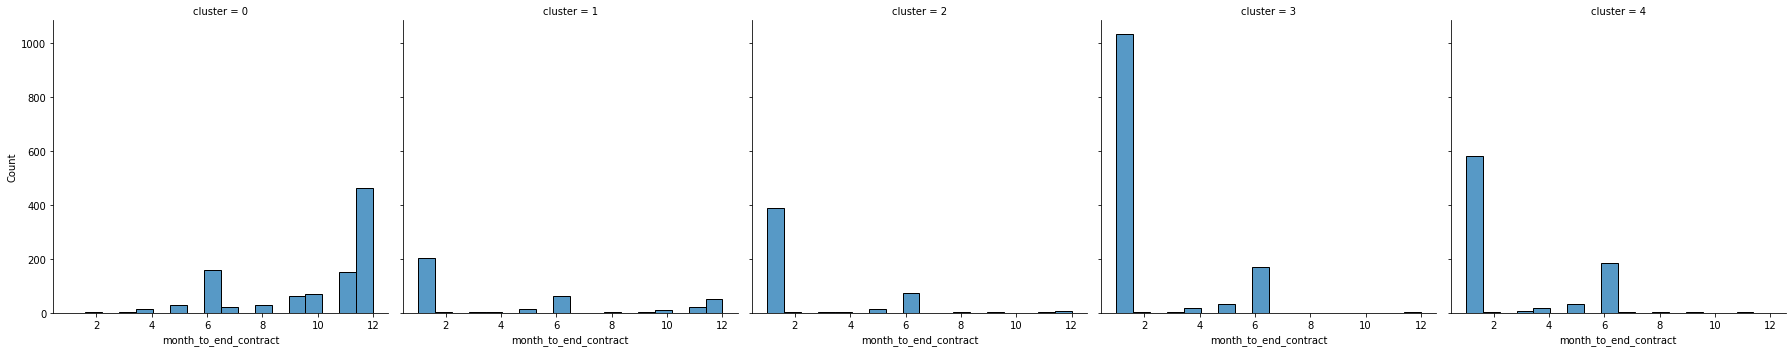

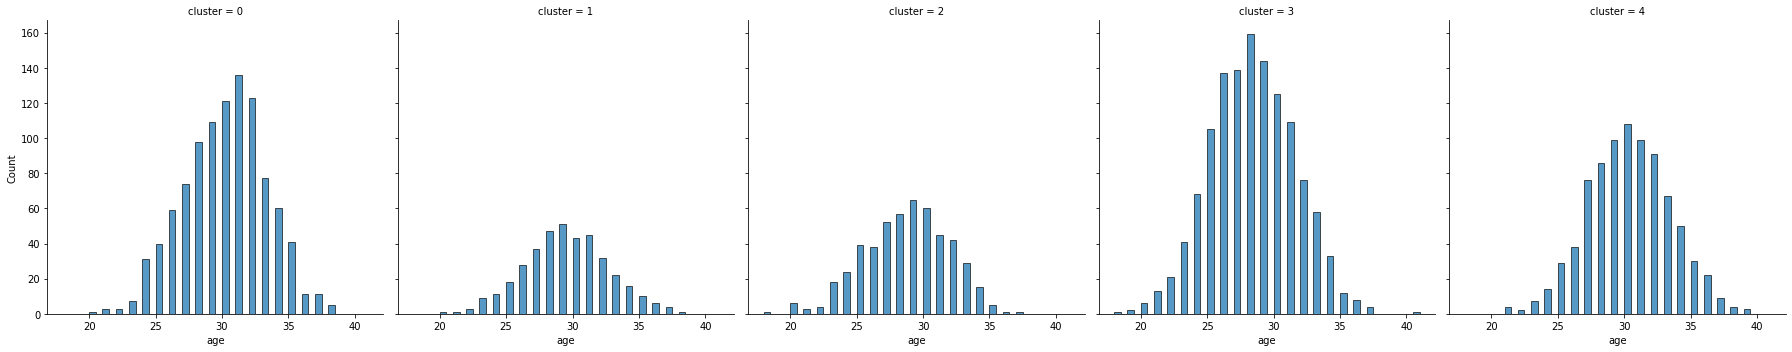

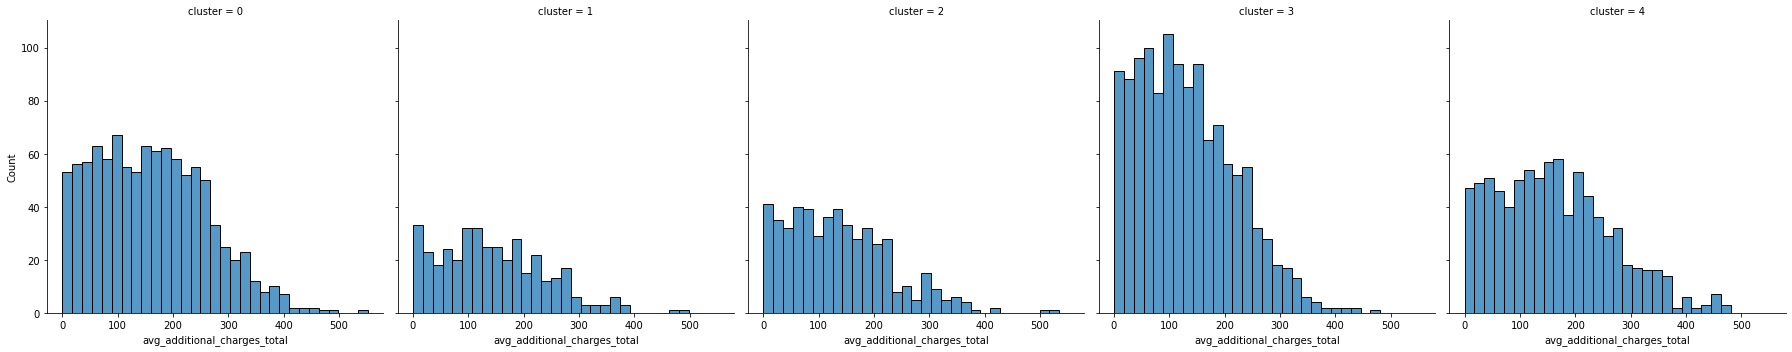

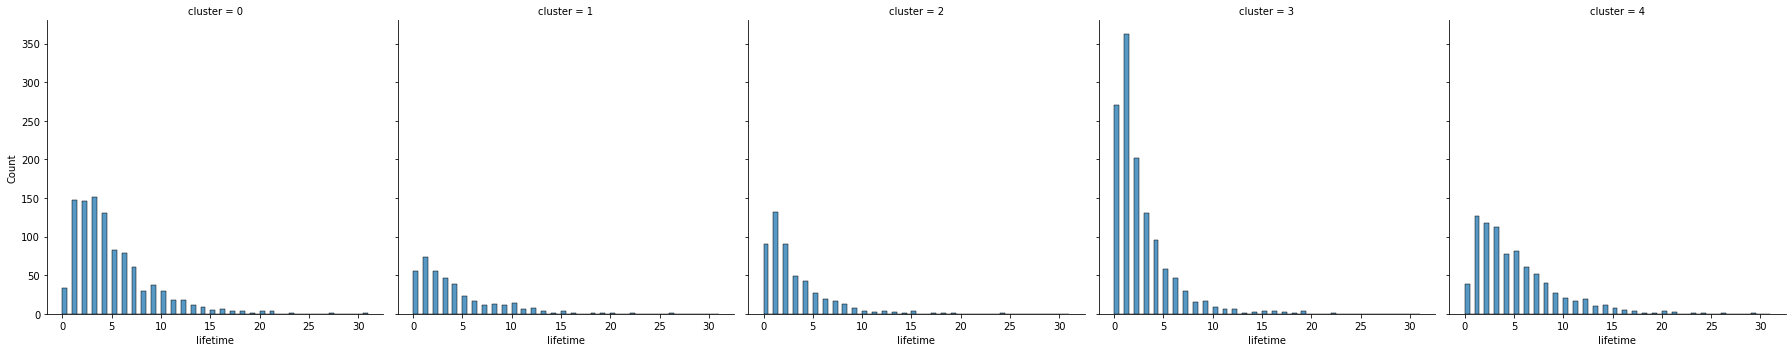

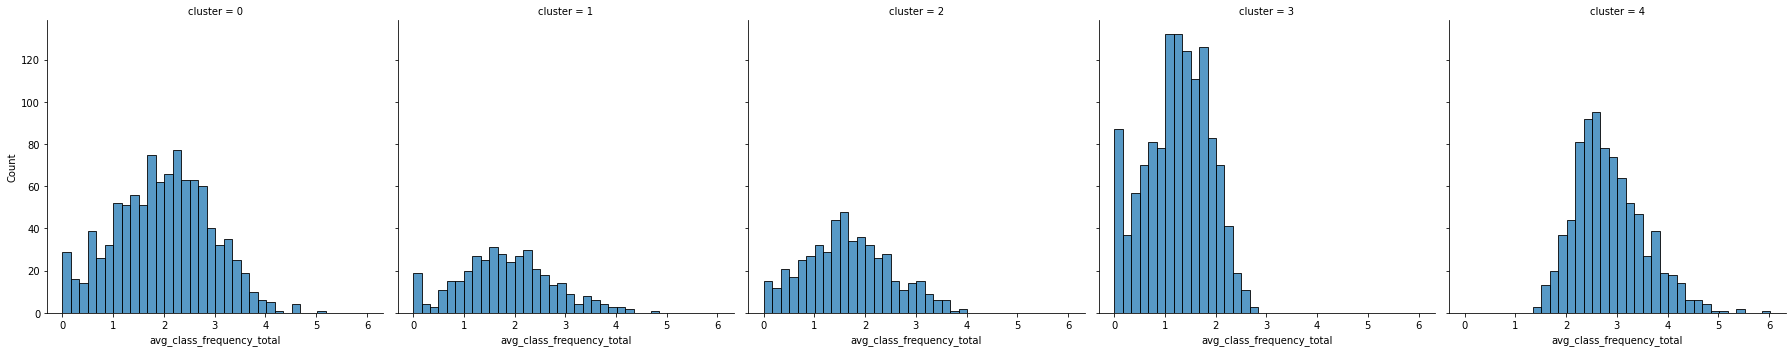

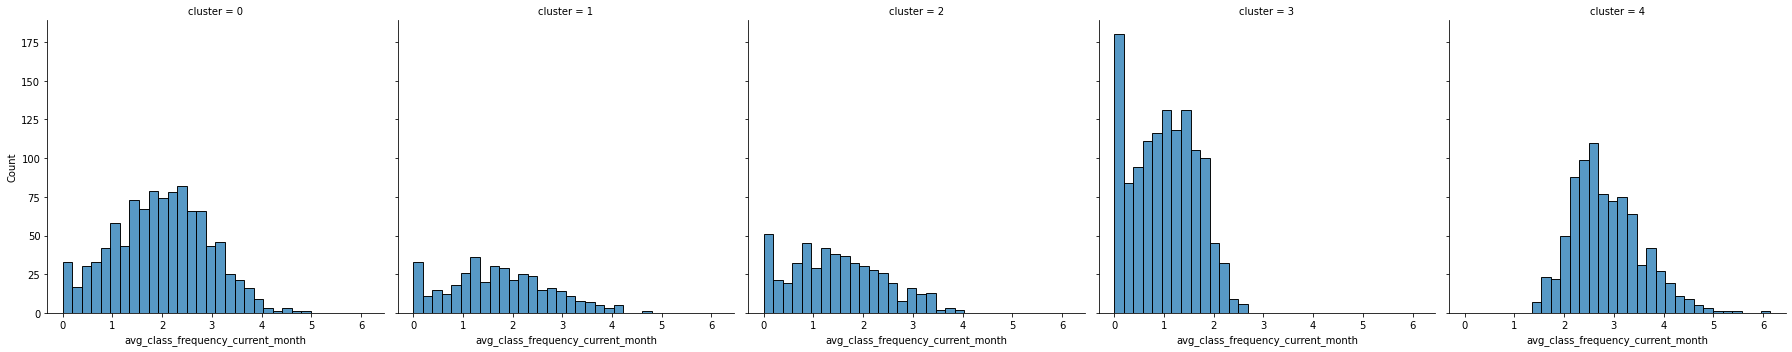

In [51]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    sns.displot(data=gym_churn.assign(cluster=lambda x: cl), x=column, col = 'cluster')

<span style="background-color: #8A2BE2; padding: 5px; border-radius: 5px;">Построила распределение признаков для каждого кластера на отдельной гистограмме..</span>

Выводы по кластерам: 
1. в основном только кластер 0 живет далеко от фитнес-центра
2. кластеры 2 и 3 в основном ходят с партнерами, 1 и 4 - без, 0- примерно поровну
3. по параметру promo_friends кластер 0, 1 и 4 в основном пришли без акции "приведи друга", кластер 2 все без исключения пришли по акции, кластер 3 примерно половина людей пришла по акции, другая половина без.
4. контракт на 12 месяцев подписан в основном у кластера 3, на 1 месяц в основном у кластера 4 и кластера 0. 
5. Телефоны оставили представители практически всех кластеров.
6. Меньше всего групповых занятий у кластера 4 и 0, у кластера 1 и 2 примерно поровну.
7. из графиков по ворзасту, как и было отмечено ранее видно, что средний возраст посетителей во все хкластерах колеблется от 28-30 лет.
8. Больше всего времени до окончания контракта у кластера 3, меньше всего у 0 и 4. 
9. Чуть больше остальных кластеров деньги на доп. услуги тратят представители кластера 1 и 3. 
10. Больше всего времени с момента обращения в фитнес центр прошло у представителей кластера 1, меньше всего у кластера 4. 
11. Самая большая частота посещений в неделю у кластера 1 (примерно 3 раза в неделю) , самая маленькая у кластера 4. 
12. Частота посещений за прошлый месяц непосредственно связана  с частотой посещений в неделю, что было уже понятно из матрицы корреляций. Выводы аналогичны предыдущему пункту. 

### Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [52]:
mean_churn = gym_churn.groupby('cluster')['churn'].mean()
mean_churn = mean_churn.reset_index()
mean_churn.columns = ['cluster', 'churn']
print(mean_churn)

   cluster     churn
0        0  0.027723
1        1  0.267532
2        2  0.443564
3        3  0.514263
4        4  0.068019


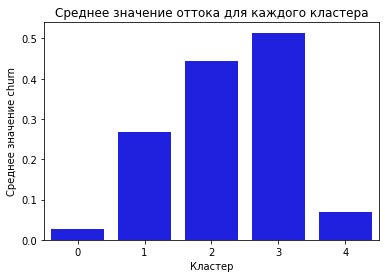

In [53]:
sns.barplot(x='cluster', y='churn', data=mean_churn, color='blue')
plt.title('Среднее значение оттока для каждого кластера')
plt.xlabel('Кластер')
plt.ylabel('Среднее значение churn')
plt.show()

In [54]:
outflow_share = gym_churn.query('churn==1').groupby('cluster_km')['churn'].count() / gym_churn.query('churn==1')['churn'].count()
outflow_share

cluster_km
0    0.026390
1    0.097078
2    0.211122
3    0.611687
4    0.053723
Name: churn, dtype: float64

In [55]:
fig = go.Figure(data=[go.Pie(labels=outflow_share.index, values=outflow_share.values, title='Процентное соотношение оттока пользователей')]);
fig.show()

Самый маленький по оттоку кластер и самый надежный - номер 3, за ним кластер 1. В них процент оттока не более 5%.
Самый большой процент оттока в кластере номер 4. 54,9%. 

### Выводы и базовые рекомендации по работе с клиентами

Был проведен анализ данных сети фитнес-центров «Культурист-датасаентист» для выявления факторов, влияющих на отток клиентов

1) Провели предобработку данных.  
2) Выбрали оптимальную модель прогнозирования оттока - Логистическую регрессию.  
3) Провели кластеризацю клиентов, оптимальным посчитали разбиение клиентов на 5 групп.
4) Визуализировали распределение признаков в каждой группой с учетом фактора оттока 
5) Для каждой группы посмотрели долю оттока клиентов и отобразили результат на круговой диаграмме.
Почти для всех признаков выявлено положительное влияние на отток клиентов.
Выявлены отличительные особенности для каждой группы:  
    0 - Отличительне особенности - никто не проживает по близости, практически нет тех, кто пришел по акции "приведи друга", относительно небольшое время с момента первого обращения в фитнес центр, примерно 3 месяца.

1- Отличительные особенности - абсолютное большинство живут по близости, практически нет тех, кто пришел по акции "Приведи друга", групповых визитов уже больше чем для 0 кластера, примерно 50%, время с момента первого обращения в фитнес центр уже больше примерно 5 месяцев.

2 - Все живут по-близости. Большинство сотрудничают с компаниями для скидки на абонемент, все записались в рамках акции - приведи друга.

3 - Все живут по-близости, 75% сотрудничают с компаниями для скидки на абонемент, примерно половина пришла по акции приведи друга, отличает от всех других кластеров очень большая длительность текущего абонемента, почти год или 12 месяцев. Достаточно большое среди кластеров время прошло с момпента первого обращения в фитнес центр - примерно 4.7 месяца.

4 - Все живут по-близости, небольшое время около 2 месяцев осталось действовать контракту, небольшое время прошлос 1 обращения, 2.5 месяца, самые низкие траты на посторонние расходы в фитнес центре примерно 131.

Стоить отметить Некоторые характеристики, которые практически не различаются для всех или большинства кластеров: gender - Везде примерно 50/50 мужичн и женщин.
phone - абсолютное большинство оставляет свой номер телефона.
age - средний возраст во всех класетрах колеблется в небольших пределах 28-30 лет.
group_visit - спорный вопрос, можно ли сказать, что он примерно одинаковый у всех кластеров. Однако везде есть факт посещения групповых занятий, значение которого колеблется в пределах от 0.2 - 0.55.  

Найбольший отток выявлен в группе 4 - 54,9%, наименьший у группы 1 и 3 - не более 5%



Рекомендации:

Продвигать акцию "приведи друга"  
Делать скидки/акции/привлекательные предложения на более длительные контракты и на групповые занятия  
Обратить внимание на возраст клиентов для привлечения целевой аудитории. Это 28-30 лет. 